<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [ ]:
df =

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Task 3: Visualize the Data
---

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

Enter a value for z: 4
Sigmoid of 4.0 is: 0.9820137900379085


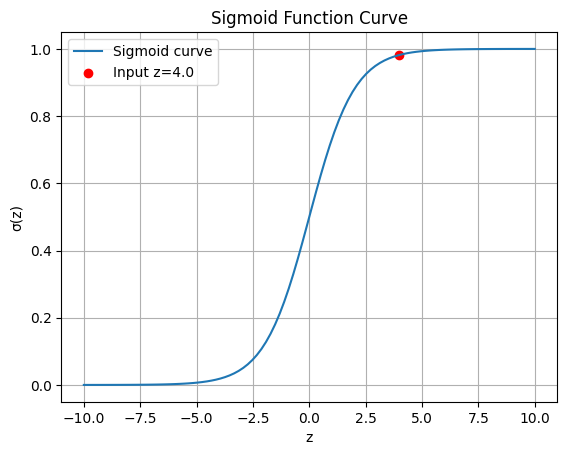

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#sigmoid func
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#user input
input = float(input("Enter z value: "))
sigmoid_value= sigmoid(input)
print(f"Sigmoid of {input} is: {sigmoid_value}")

#generating range of values to plot the curve
z_values = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z_values)

# Plotting the curve
plt.plot(z_values, sigmoid_values, label='Sigmoid curve')
plt.scatter(input, sigmoid_value, color='red', label=f'Input z={input}')  # Mark user input on curve
plt.title("Sigmoid Function Curve")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.legend()
plt.grid(True)
plt.show()


### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [5]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Gradient function
def compute_gradient(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    gradient = (1/m) * np.dot(X.T, (h - y))
    return gradient
#eg
X = np.array([[1, 2], [1, 3], [1, 4], [1, 5]])
y = np.array([0, 0, 1, 1])
theta = np.zeros(X.shape[1])


cost = compute_cost(theta, X, y)
grad = compute_gradient(theta, X, y)

print("Initial Cost J(theta):", cost)
print("Gradient:", grad)


Initial Cost J(theta): 0.6931471805599453
Gradient: [ 0.  -0.5]


### Task 6: Cost and Gradient at Initialization
---

In [ ]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function J(theta)
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1/m) * (y.T @ np.log(h) + (1-y).T @ np.log(1-h))
    return cost

# Gradient function
def compute_gradient(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    gradient = (1/m) * (X.T @ (h - y))
    return gradient

# Example dataset (tiny one for demo)
X = np.array([[1, 2], [1, 3], [1, 4], [1, 5]])   # Add intercept (first col = 1)
y = np.array([0, 0, 1, 1])

# Initialize theta with zeros
theta = np.zeros(X.shape[1])

# Compute initial cost and gradient
initial_cost = compute_cost(X, y, theta)
initial_gradient = compute_gradient(X, y, theta)

print("Initial Cost:", initial_cost)
print("Initial Gradient:", initial_gradient)


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$